In [1]:
%matplotlib notebook
import numpy as np
from helper_functions import *
from complex import Complex
from molecule import Molecule

In [2]:
num_features = 3

coords1 = np.array(
[
    [2,2,2],
    [-2,-2,-2],
    [2,2,-2],
    [2,-2,2],
    [-2,2,2],
    [-2,-2,2],
    [2,-2,-2],
    [-2,2,-2]
]
)
features1 = np.random.rand(coords1.shape[0], num_features-1)
features1 = np.concatenate((np.ones((coords1.shape[0], 1)), features1), axis=1)

coords2 = np.concatenate((coords1*5, coords1*10), axis=0)
features2 = np.random.rand(coords2.shape[0], num_features-1)
features2 = np.concatenate((np.ones((coords2.shape[0], 1))*-1, features2), axis=1)

print(coords1, coords2)

[[ 2  2  2]
 [-2 -2 -2]
 [ 2  2 -2]
 [ 2 -2  2]
 [-2  2  2]
 [-2 -2  2]
 [ 2 -2 -2]
 [-2  2 -2]] [[ 10  10  10]
 [-10 -10 -10]
 [ 10  10 -10]
 [ 10 -10  10]
 [-10  10  10]
 [-10 -10  10]
 [ 10 -10 -10]
 [-10  10 -10]
 [ 20  20  20]
 [-20 -20 -20]
 [ 20  20 -20]
 [ 20 -20  20]
 [-20  20  20]
 [-20 -20  20]
 [ 20 -20 -20]
 [-20  20 -20]]


In [3]:
max_dist = 25.0
resolution = 0.1

grid = Complex(max_dist=max_dist, resolution=resolution, num_features=num_features)
mol1 = Molecule(coords1, features1)
mol2 = Molecule(coords2, features2)

Number of heavy atoms in molecule = 8
Number of features = 3
Max distance between atoms along
x:(-2.0, 2.0, 4.0)
y:(-2.0, 2.0, 4.0)
z:(-2.0, 2.0, 4.0)
Number of heavy atoms in molecule = 16
Number of features = 3
Max distance between atoms along
x:(-20.0, 20.0, 40.0)
y:(-20.0, 20.0, 40.0)
z:(-20.0, 20.0, 40.0)


In [4]:
grid.box_size

501

<IPython.core.display.Javascript object>


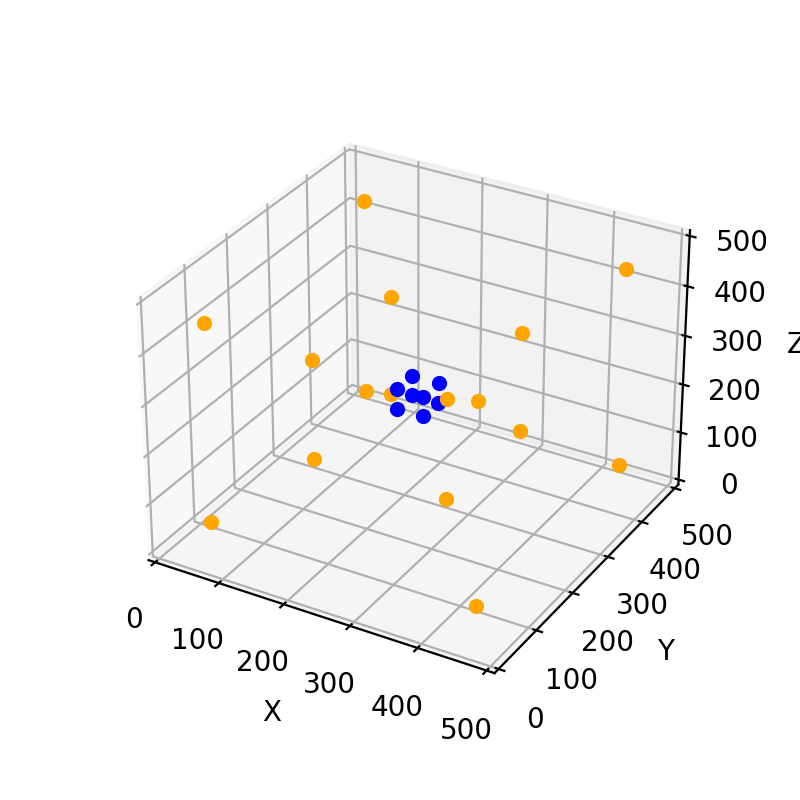

In [5]:
grid.update_tensor([mol1, mol2])
grid.plot_tensor(feature_axis=0, protein_alpha=1)

<IPython.core.display.Javascript object>


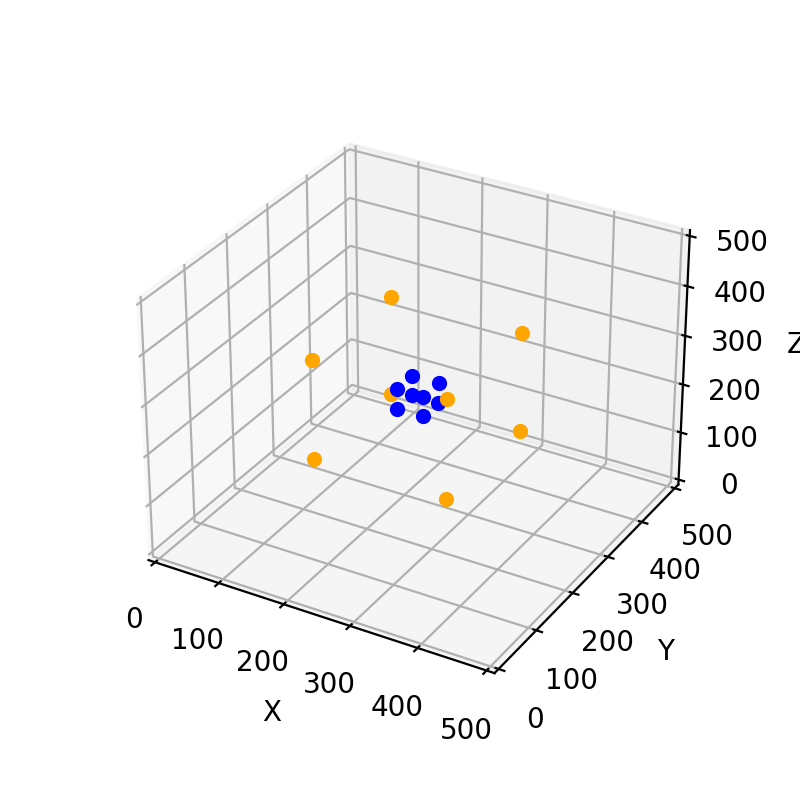

In [6]:
mol2.crop(mol1.get_centroid(), 15, 15, 15)
grid.update_tensor([mol1, mol2])
grid.plot_tensor(feature_axis=0, protein_alpha=1)

<IPython.core.display.Javascript object>


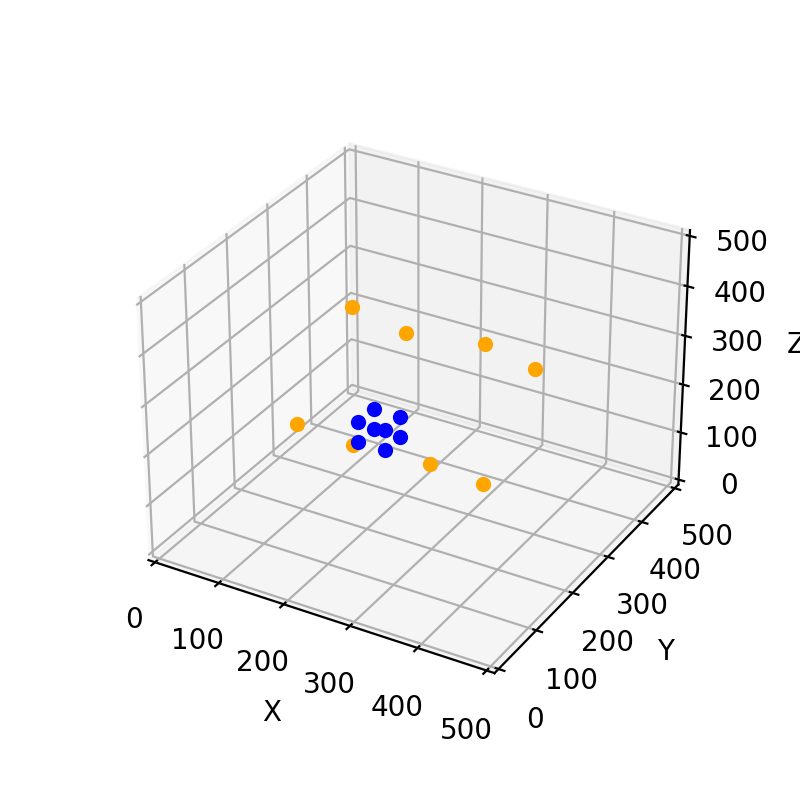

In [7]:
mol1.translate(0, -10, 0)
mol2.rotate('x', 45, degrees=True)
mol1.rotate('xyz', [360,360,360], degrees=True)
grid.update_tensor([mol1, mol2])
grid.plot_tensor(feature_axis=0, protein_alpha=1)

#### Using "set_in_grid" method is equivalent of updating tensor with list of molecules

<IPython.core.display.Javascript object>


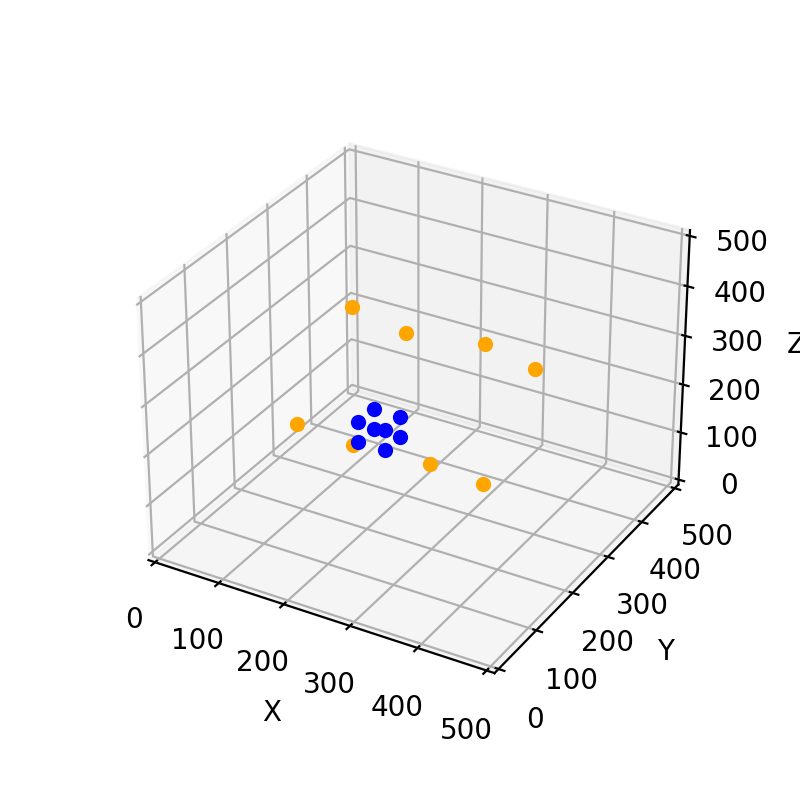

In [8]:
grid.update_tensor([])
mol1.set_in_grid(grid)
mol2.set_in_grid(grid)
grid.plot_tensor(feature_axis=0, protein_alpha=1)

#### Creating a smaller box from the start

Number of heavy atoms in molecule = 8
Number of features = 3
Max distance between atoms along
x:(-2.0, 2.0, 4.0)
y:(-2.0, 2.0, 4.0)
z:(-2.0, 2.0, 4.0)
Number of heavy atoms in molecule = 16
Number of features = 3
Max distance between atoms along
x:(-20.0, 20.0, 40.0)
y:(-20.0, 20.0, 40.0)
z:(-20.0, 20.0, 40.0)
Some atoms are outside the box and will be discarded.


<IPython.core.display.Javascript object>


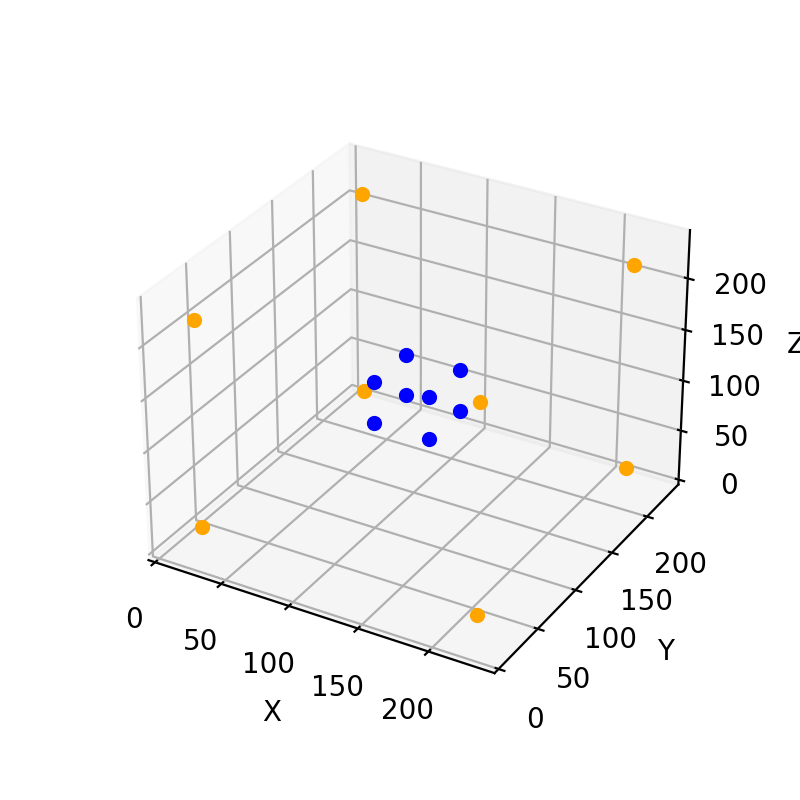

In [13]:
max_dist = 12.0
resolution = 0.1

grid = Complex(max_dist=max_dist, resolution=resolution, num_features=num_features)
mol1 = Molecule(coords1, features1)
mol2 = Molecule(coords2, features2)
grid.update_tensor([mol1, mol2])
grid.plot_tensor(feature_axis=0, protein_alpha=1)